# Importing libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Reading AirBnb Dataset

In [2]:
df = pd.read_csv("/Users/ashishkesari/Downloads/train.csv")

In [3]:
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [4]:
df.shape

(74111, 29)

In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

## Checking Unique values

In [9]:
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude", 
        "host_has_profile_pic", "host_identity_verified"]

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: host_response_rate, Length: 80, dtype: int64 

---------------------------------------------------------------
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
C

## Checking for null values

In [10]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


### Forward fill method

In [11]:
df.last_review.fillna(method="ffill",inplace=True)

In [12]:
df.first_review.fillna(method="ffill",inplace=True)

In [13]:
df.host_since.fillna(method="ffill",inplace=True)

<Axes: xlabel='bathrooms', ylabel='Density'>

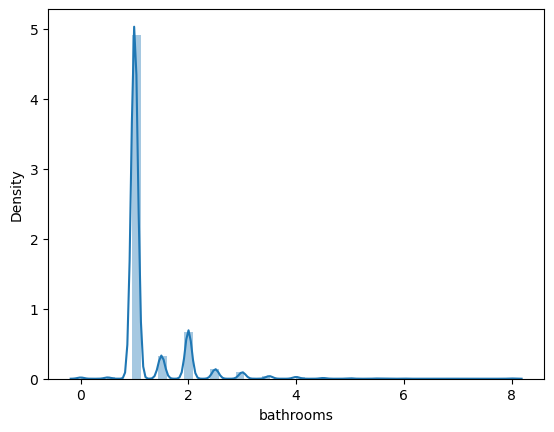

In [14]:
sns.distplot(df["bathrooms"])

In [15]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

<Axes: xlabel='review_scores_rating', ylabel='Density'>

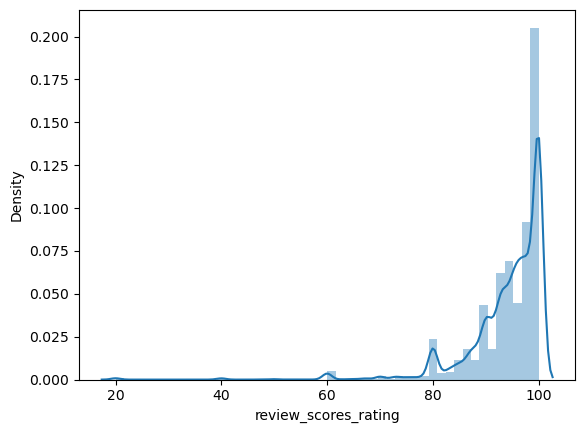

In [16]:
sns.distplot(df["review_scores_rating"])

In [17]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

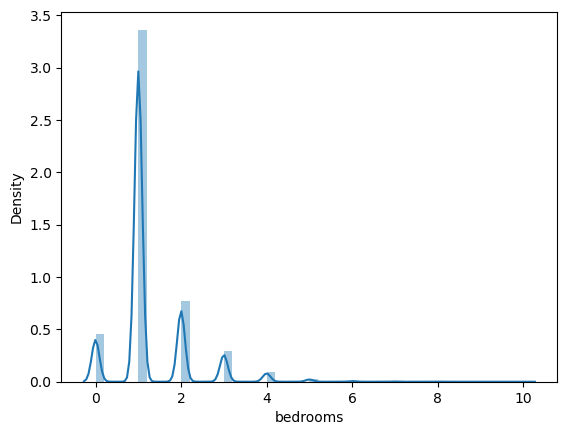

In [18]:
sns.distplot(df["bedrooms"])
plt.show()

In [19]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

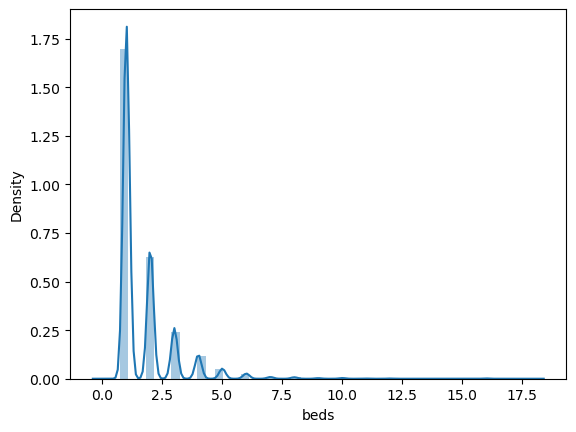

In [20]:
sns.distplot(df["beds"])
plt.show()

In [21]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

In [22]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))
    
df["amenities"] = amenities_count

In [23]:
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

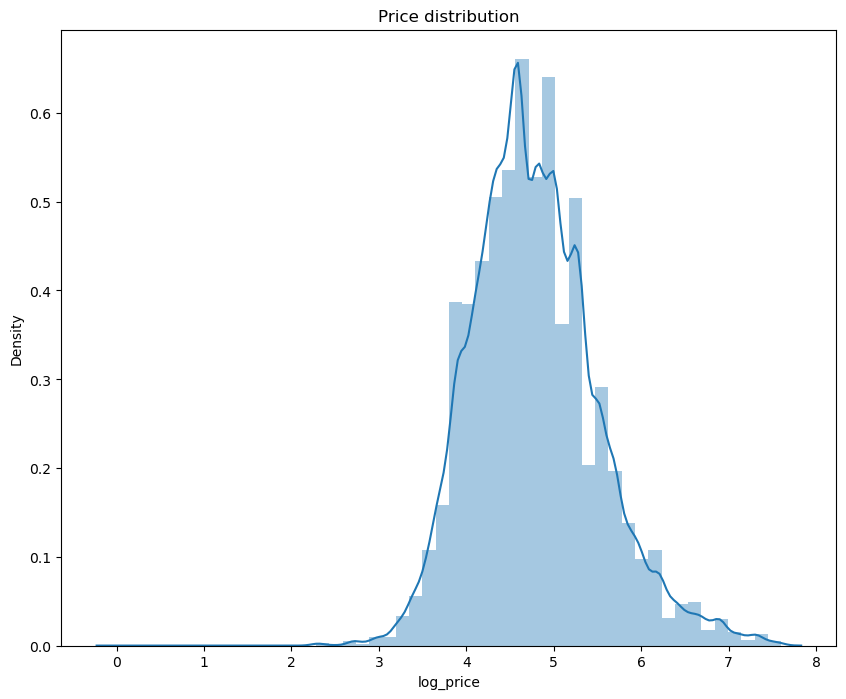

In [24]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

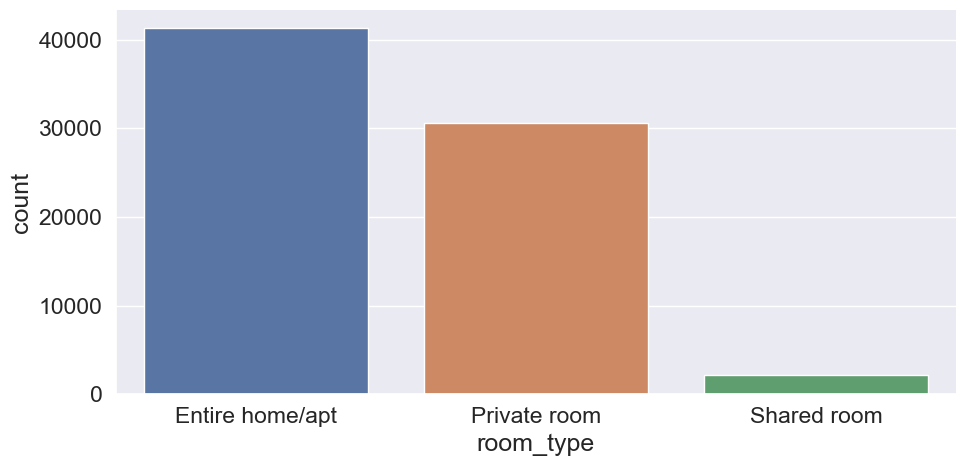

In [25]:
plot_catplot("room_type", "count", 5, 2)

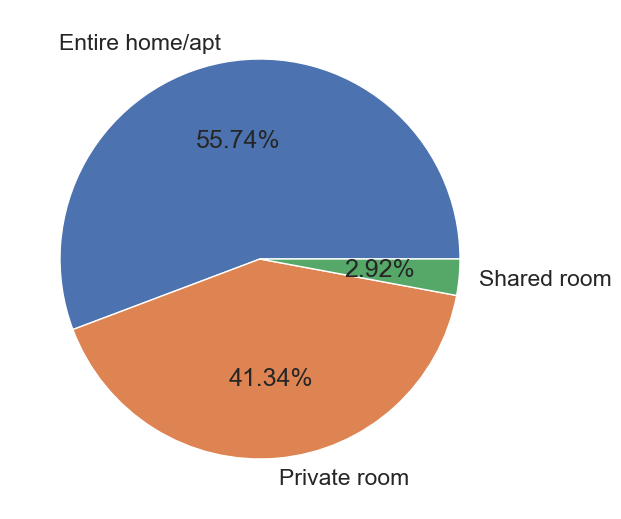

In [26]:
plot_piechart("room_type") 

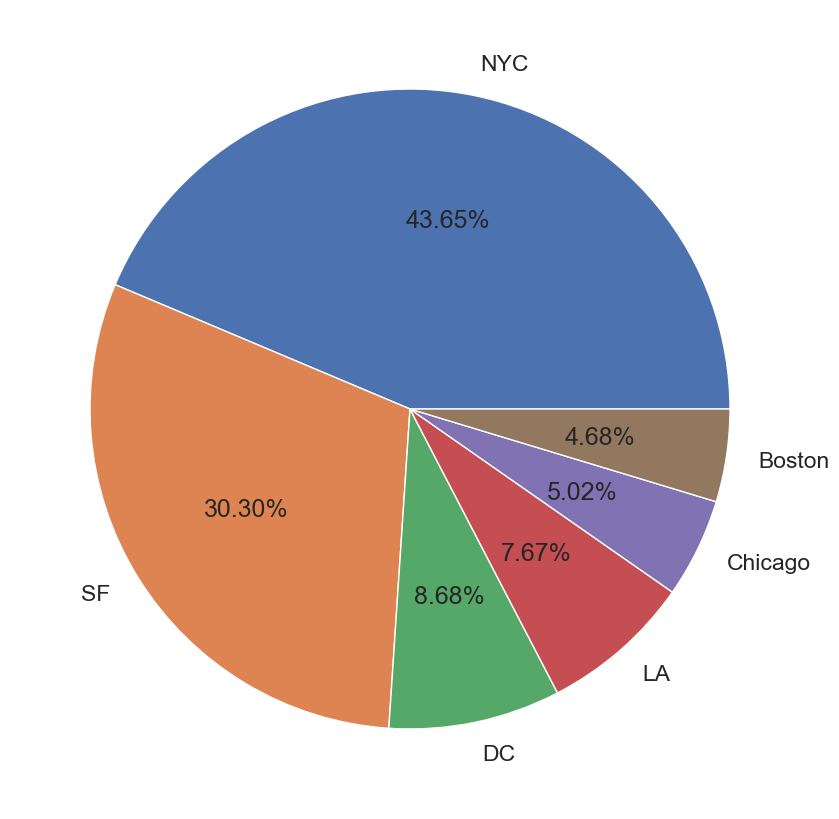

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

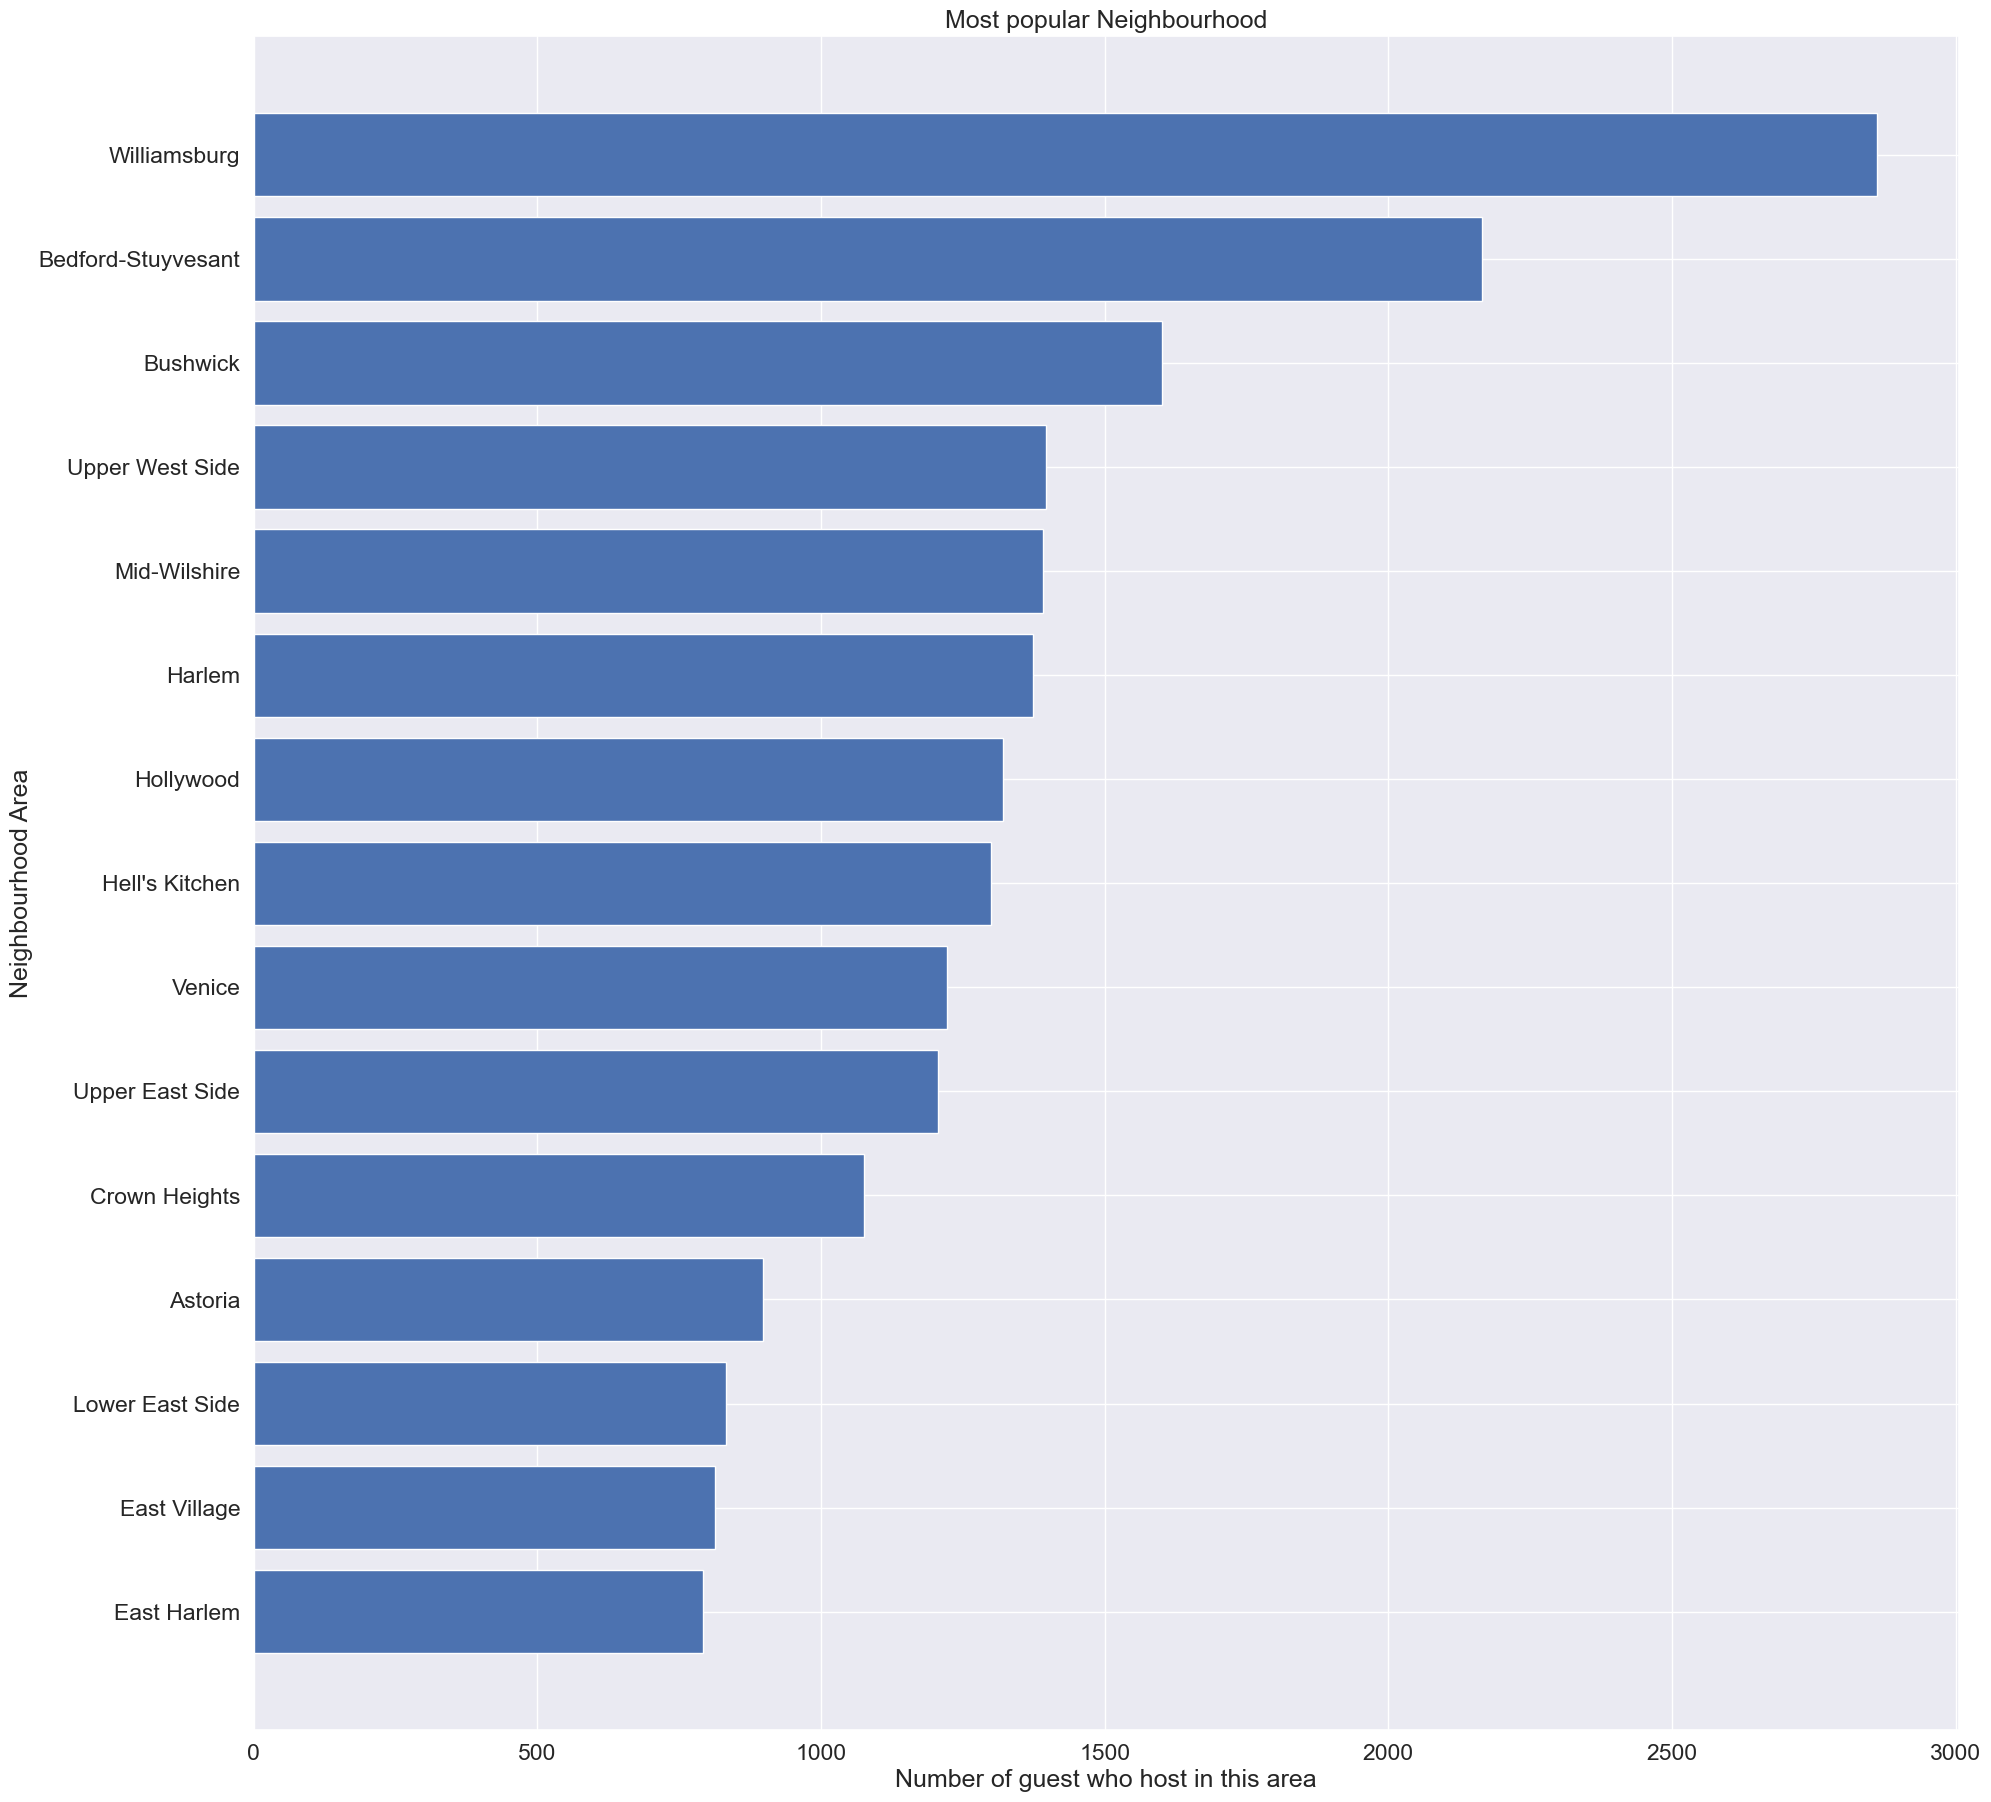

In [28]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

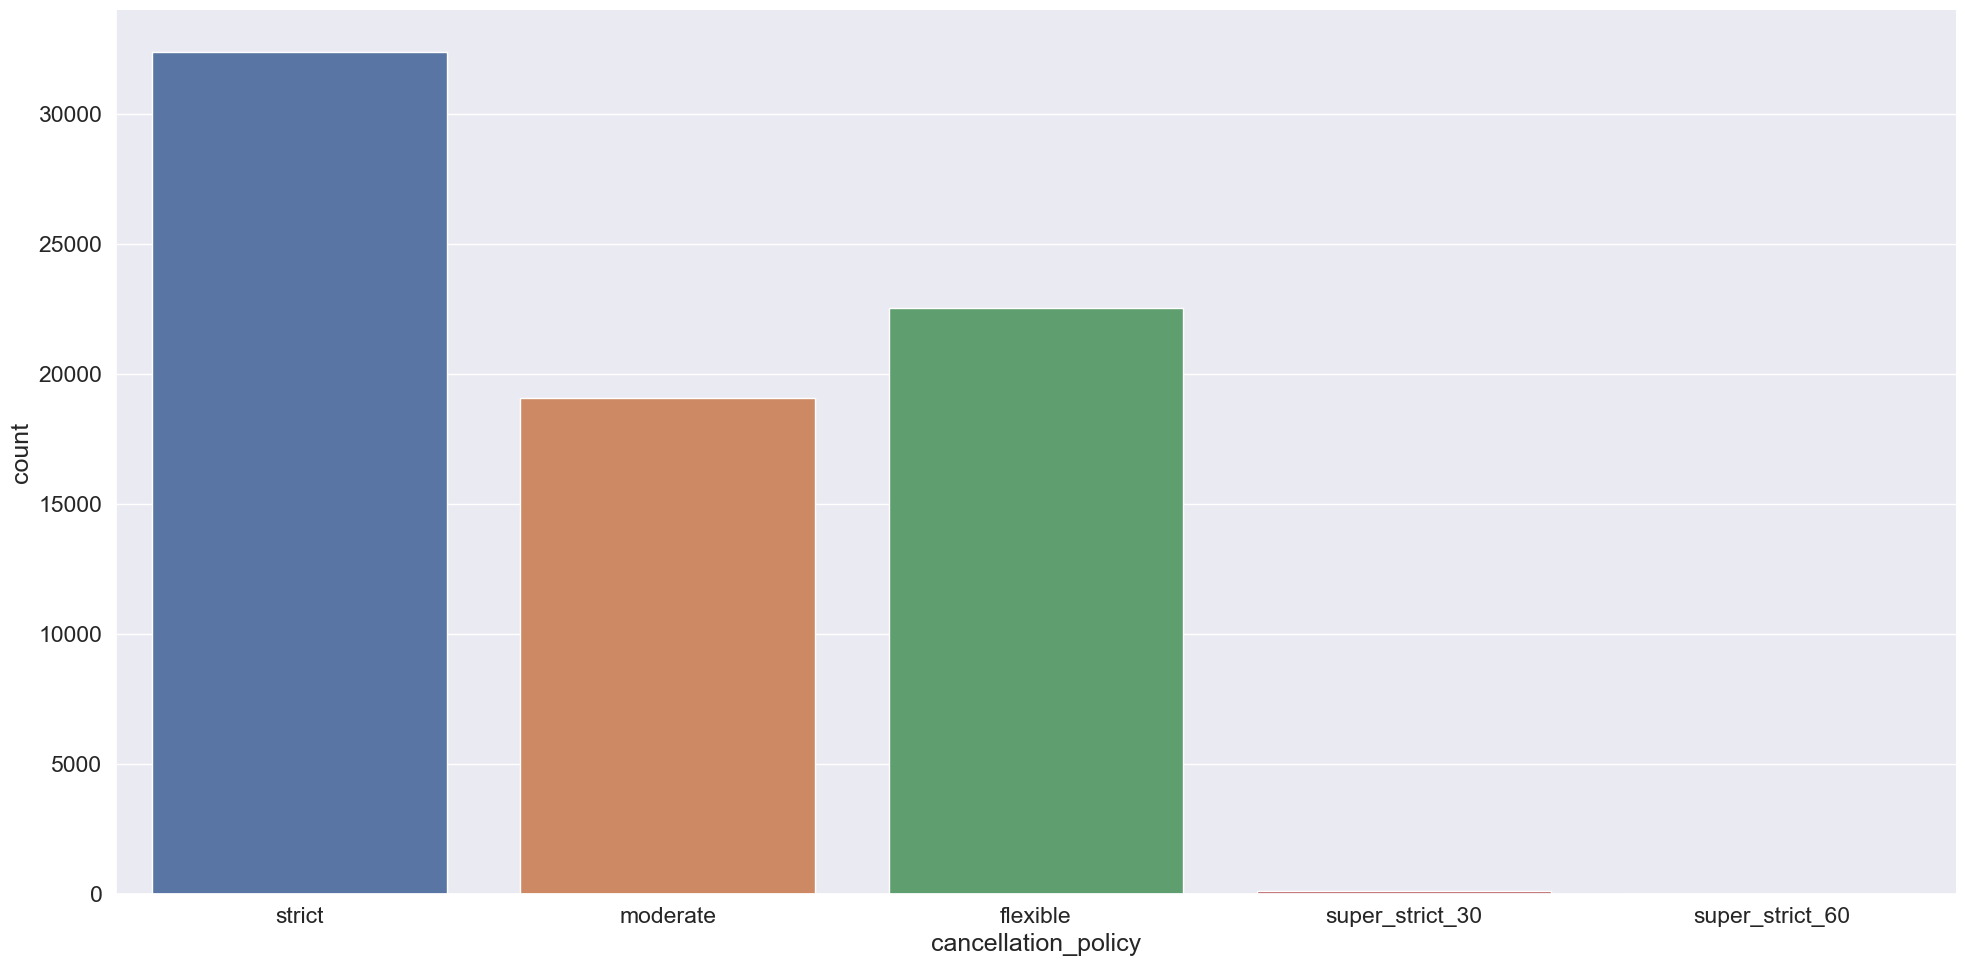

In [29]:
plot_catplot("cancellation_policy","count",10, 2)

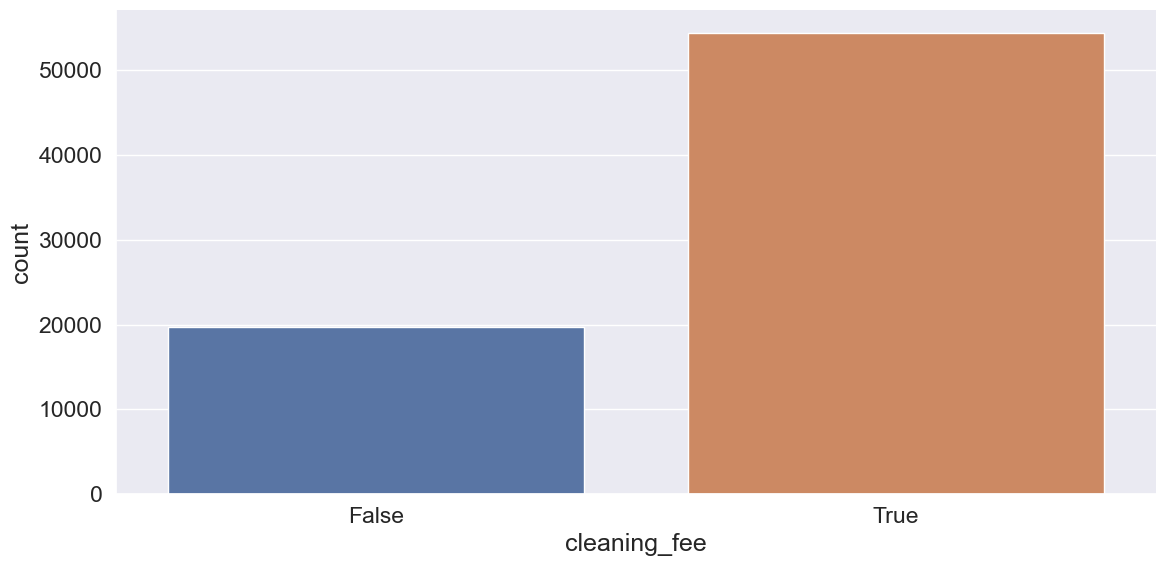

In [30]:
plot_catplot("cleaning_fee","count",6,2)

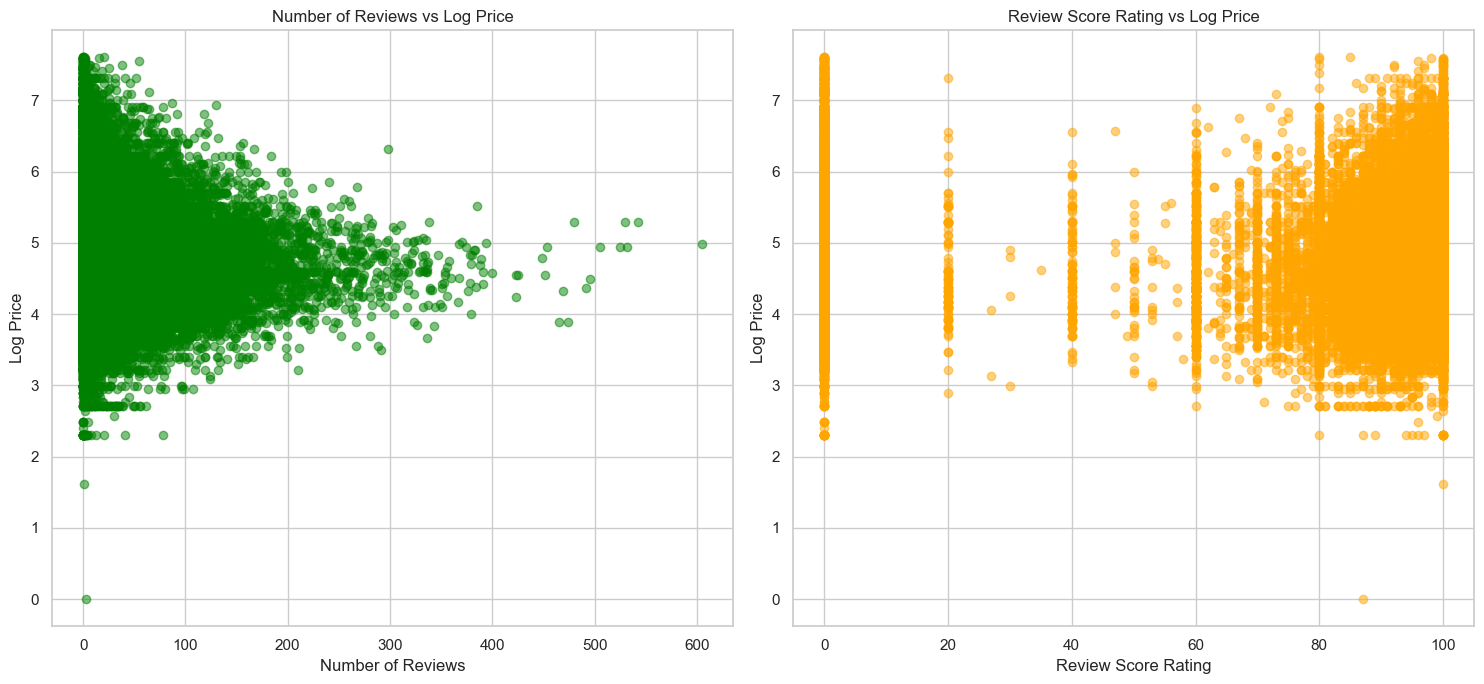

In [103]:
def plot_scatter(x, y, title, x_label, y_label, face, axes):
    axes.scatter(x, y, color=face, alpha=0.5)
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    return axes

# Plot scatter plots for relevant columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1 = plot_scatter(df.number_of_reviews, df.log_price,
                   'Number of Reviews vs Log Price', 
                   'Number of Reviews', 'Log Price',
                   'green', ax1)

ax2 = plot_scatter(df.review_scores_rating, df.log_price,
                   'Review Score Rating vs Log Price', 
                   'Review Score Rating', 'Log Price',
                   'orange', ax2)

plt.tight_layout()
plt.show()


## Zillow Housing dataset

In [31]:
df1 = pd.read_csv("/Users/ashishkesari/Downloads/zillowhouses.csv")

In [32]:
df1.head()

RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     91982         1       77494        zip        TX    TX      Katy   
1     61148         2        8701        zip        NJ    NJ  Lakewood   
2     91940         3       77449        zip        TX    TX      Katy   
3     62080         4       11368        zip        NY    NY  New York   
4     91733         5       77084        zip        TX    TX   Houston   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  207485.703780   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County  133585.097374   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  102871.872959   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  149602.706723   
4   Houston-The Woodlands-Sugar Land, TX     Harris County  101302.971510   

   ...     2023-04-30     2023-05-31     2023-06-30     2023-07-31  \
0  ...  466751.780878  468726.804969  471807.601699  474563.336988   
1  ...  520263.231641  525475.520845  531251.303422  537191.962370   
2  ...  274846.719598  274369.046420  274746.269302  275503.716629   
3  ...  479923.054633  472743.529087  467290.671605  465448.814546   
4  ...  267681.680552  267540.058706  268133.811302  268971.439621   

      2023-08-31     2023-09-30     2023-10-31     2023-11-30     2023-12-31  \
0  477007.688607  478804.330986  480028.430468  480710.180754  481316.572625   
1  542925.266593  549077.368237  556217.922068  562834.329572  567473.020412   
2  276396.307063  276927.656590  276917.493877  276683.723079  276394.060721   
3  465442.804356  464879.604442  462831.805655  459442.673123  455111.736727   
4  269838.607768  270263.751352  270254.168901  269836.644053  269417.566483   

      2024-01-31  
0  482674.676887  
1  569013.823555  
2  276746.624493  
3  452253.544364  
4  269463.142330  

[5 rows x 298 columns]

In [33]:
df1.rename(columns={"RegionName": "zipcode"}, inplace=True)

df1.to_csv("df2.csv", index=False)
df2 = pd.read_csv("df2.csv")

# Creating df3 and storing df2 in it
df3 = df2.copy()


In [34]:
df2.head()

RegionID  SizeRank  zipcode RegionType StateName State      City  \
0     91982         1    77494        zip        TX    TX      Katy   
1     61148         2     8701        zip        NJ    NJ  Lakewood   
2     91940         3    77449        zip        TX    TX      Katy   
3     62080         4    11368        zip        NY    NY  New York   
4     91733         5    77084        zip        TX    TX   Houston   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  207485.703780   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County  133585.097374   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  102871.872959   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  149602.706723   
4   Houston-The Woodlands-Sugar Land, TX     Harris County  101302.971510   

   ...     2023-04-30     2023-05-31     2023-06-30     2023-07-31  \
0  ...  466751.780878  468726.804969  471807.601699  474563.336988   
1  ...  520263.231641  525475.520845  531251.303422  537191.962370   
2  ...  274846.719598  274369.046420  274746.269302  275503.716629   
3  ...  479923.054633  472743.529087  467290.671605  465448.814546   
4  ...  267681.680552  267540.058706  268133.811302  268971.439621   

      2023-08-31     2023-09-30     2023-10-31     2023-11-30     2023-12-31  \
0  477007.688607  478804.330986  480028.430468  480710.180754  481316.572625   
1  542925.266593  549077.368237  556217.922068  562834.329572  567473.020412   
2  276396.307063  276927.656590  276917.493877  276683.723079  276394.060721   
3  465442.804356  464879.604442  462831.805655  459442.673123  455111.736727   
4  269838.607768  270263.751352  270254.168901  269836.644053  269417.566483   

      2024-01-31  
0  482674.676887  
1  569013.823555  
2  276746.624493  
3  452253.544364  
4  269463.142330  

[5 rows x 298 columns]

In [35]:
df3.head()

RegionID  SizeRank  zipcode RegionType StateName State      City  \
0     91982         1    77494        zip        TX    TX      Katy   
1     61148         2     8701        zip        NJ    NJ  Lakewood   
2     91940         3    77449        zip        TX    TX      Katy   
3     62080         4    11368        zip        NY    NY  New York   
4     91733         5    77084        zip        TX    TX   Houston   

                                   Metro        CountyName     2000-01-31  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County  207485.703780   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County  133585.097374   
2   Houston-The Woodlands-Sugar Land, TX     Harris County  102871.872959   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County  149602.706723   
4   Houston-The Woodlands-Sugar Land, TX     Harris County  101302.971510   

   ...     2023-04-30     2023-05-31     2023-06-30     2023-07-31  \
0  ...  466751.780878  468726.804969  471807.601699  474563.336988   
1  ...  520263.231641  525475.520845  531251.303422  537191.962370   
2  ...  274846.719598  274369.046420  274746.269302  275503.716629   
3  ...  479923.054633  472743.529087  467290.671605  465448.814546   
4  ...  267681.680552  267540.058706  268133.811302  268971.439621   

      2023-08-31     2023-09-30     2023-10-31     2023-11-30     2023-12-31  \
0  477007.688607  478804.330986  480028.430468  480710.180754  481316.572625   
1  542925.266593  549077.368237  556217.922068  562834.329572  567473.020412   
2  276396.307063  276927.656590  276917.493877  276683.723079  276394.060721   
3  465442.804356  464879.604442  462831.805655  459442.673123  455111.736727   
4  269838.607768  270263.751352  270254.168901  269836.644053  269417.566483   

      2024-01-31  
0  482674.676887  
1  569013.823555  
2  276746.624493  
3  452253.544364  
4  269463.142330  

[5 rows x 298 columns]

In [36]:
for column in df2.columns:
    print(column)


RegionID
SizeRank
zipcode
RegionType
StateName
State
City
Metro
CountyName
2000-01-31
2000-02-29
2000-03-31
2000-04-30
2000-05-31
2000-06-30
2000-07-31
2000-08-31
2000-09-30
2000-10-31
2000-11-30
2000-12-31
2001-01-31
2001-02-28
2001-03-31
2001-04-30
2001-05-31
2001-06-30
2001-07-31
2001-08-31
2001-09-30
2001-10-31
2001-11-30
2001-12-31
2002-01-31
2002-02-28
2002-03-31
2002-04-30
2002-05-31
2002-06-30
2002-07-31
2002-08-31
2002-09-30
2002-10-31
2002-11-30
2002-12-31
2003-01-31
2003-02-28
2003-03-31
2003-04-30
2003-05-31
2003-06-30
2003-07-31
2003-08-31
2003-09-30
2003-10-31
2003-11-30
2003-12-31
2004-01-31
2004-02-29
2004-03-31
2004-04-30
2004-05-31
2004-06-30
2004-07-31
2004-08-31
2004-09-30
2004-10-31
2004-11-30
2004-12-31
2005-01-31
2005-02-28
2005-03-31
2005-04-30
2005-05-31
2005-06-30
2005-07-31
2005-08-31
2005-09-30
2005-10-31
2005-11-30
2005-12-31
2006-01-31
2006-02-28
2006-03-31
2006-04-30
2006-05-31
2006-06-30
2006-07-31
2006-08-31
2006-09-30
2006-10-31
2006-11-30
2006-12-31
2

## Handling null values in Zillow Dataset 

In [37]:
#date_columns = df2.columns[9:] 
columns_containing_2023 = [col for col in df2.columns if '2023' in col]
columns_containing_2022 = [col for col in df2.columns if '2022' in col]
columns_containing_2021 = [col for col in df2.columns if '2021' in col]

print(columns_containing_2023)
print(columns_containing_2022)
print(columns_containing_2021)
# selected_columns = ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
#                     '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31']

# Calculate the mean for selected columns
# mean_values = df2[columns_containing_2023]
# mean_values = [(sum(df2[col]) / len(df2[col])) for col in df2[columns_containing_2023]]

# for col in df2[columns_containing_2023]:
#     print(df2[col])

print(df2[columns_containing_2023].isna().values.any())
print(df2[columns_containing_2022].isna().values.any())
print(df2[columns_containing_2022].isna().values.any())

['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31']
['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31']
['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31']
True
True
True


### Assuming only 3 Years 2023 and 2022 and 2021 and finding out mean values for these years

In [38]:
# Assuming df2 is your DataFrame and columns_containing_2023 is the list of column names
# Calculate the mean for each column
mean_values_2023 = df2[columns_containing_2023].mean()
mean_values_2022 = df2[columns_containing_2022].mean()
mean_values_2021 = df2[columns_containing_2021].mean()



# Fill null values with the mean
df2[columns_containing_2023] = df2[columns_containing_2023].fillna(mean_values_2023)
df2[columns_containing_2022] = df2[columns_containing_2022].fillna(mean_values_2022)
df2[columns_containing_2021] = df2[columns_containing_2021].fillna(mean_values_2021)

print(df2[columns_containing_2023])
print(df2[columns_containing_2022])
print(df2[columns_containing_2021])

         2023-01-31     2023-02-28     2023-03-31     2023-04-30  \
0     467860.713259  466579.140474  465558.288535  466751.780878   
1     511265.030464  513415.701179  516224.085126  520263.231641   
2     280217.832688  277885.862204  276036.176589  274846.719598   
3     499949.895758  493009.657433  486619.415465  479923.054633   
4     271369.820397  269783.239687  268467.980745  267681.680552   
...             ...            ...            ...            ...   
9995   99334.550312  100404.812830  103322.366147  106724.537079   
9996  127520.063856  127038.164517  127166.028174  128068.767719   
9997  131137.765323  130154.620401  129570.548187  131484.454429   
9998  226245.638310  226639.850251  227863.600553  229711.858969   
9999  232220.829744  231687.429972  231207.983488  232392.704198   

         2023-05-31     2023-06-30     2023-07-31     2023-08-31  \
0     468726.804969  471807.601699  474563.336988  477007.688607   
1     525475.520845  531251.303422  537191.9623

In [39]:

print(df2[columns_containing_2023].isna().values.any())
print(df2[columns_containing_2022].isna().values.any())
print(df2[columns_containing_2021].isna().values.any())

False
False
False


In [40]:
mean_2023_by_listing = df2[columns_containing_2023].mean(axis=1)
mean_2022_by_listing = df2[columns_containing_2022].mean(axis=1)
mean_2021_by_listing = df2[columns_containing_2021].mean(axis = 1)
print("Mean for each listing specifically in the year 2023:")
print(mean_2023_by_listing)
print("Mean for each listing specifically in the year 2022:")
print(mean_2022_by_listing)
print("Mean for each listing specifically in the year 2021:")
print(mean_2021_by_listing)

Mean for each listing specifically in the year 2023:
0       473309.572520
1       536134.561828
2       276410.405397
3       472724.471903
4       269296.564130
            ...      
9995    106603.978813
9996    126500.136529
9997    140843.479850
9998    232707.427463
9999    235968.708300
Length: 10000, dtype: float64
Mean for each listing specifically in the year 2022:
0       459743.320266
1       481336.835406
2       275248.976604
3       515956.423042
4       265189.228237
            ...      
9995    104743.841001
9996    130328.050827
9997    126636.267540
9998    222143.131944
9999    227797.545598
Length: 10000, dtype: float64
Mean for each listing specifically in the year 2021:
0       378494.530772
1       387167.808512
2       224912.884999
3       517671.047800
4       220598.481232
            ...      
9995     96205.487908
9996    115838.395951
9997    112590.101114
9998    195612.205300
9999    206424.208326
Length: 10000, dtype: float64


In [41]:
# median_values_2023 = df3[columns_containing_2023].median()
# median_values_2022 = df3[columns_containing_2022].median()
# median_values_2021 = df3[columns_containing_2021].median()

# # Fill null values with the median
# df2[columns_containing_2023] = df3[columns_containing_2023].fillna(median_values_2023)
# df2[columns_containing_2022] = df3[columns_containing_2022].fillna(median_values_2022)
# df2[columns_containing_2021] = df3[columns_containing_2021].fillna(median_values_2021)

# print(df3[columns_containing_2023])
# print(df3[columns_containing_2022])
# print(df3[columns_containing_2021])


In [42]:
# median_2023_by_listing = df3[columns_containing_2023].median(axis=1)
# median_2022_by_listing = df3[columns_containing_2022].median(axis=1)
# median_2021_by_listing = df3[columns_containing_2021].median(axis=1)

# print("Median for each listing specifically in the year 2023:")
# print(median_2023_by_listing)
# print("Median for each listing specifically in the year 2022:")
# print(median_2022_by_listing)
# print("Median for each listing specifically in the year 2021:")
# print(median_2021_by_listing)



# Finding Median values to find out best ROI

In [43]:
median_2023_by_listing = df2[columns_containing_2023].median(axis=1)
median_2022_by_listing = df2[columns_containing_2022].median(axis=1)
median_2021_by_listing = df2[columns_containing_2021].median(axis=1)

print("Median for each listing specifically in the year 2023:")
print(median_2023_by_listing)
print("Median for each listing specifically in the year 2022:")
print(median_2022_by_listing)
print("Median for each listing specifically in the year 2021:")
print(median_2021_by_listing)



Median for each listing specifically in the year 2023:
0       473185.469343
1       534221.632896
2       276395.183892
3       466369.743076
4       269600.403085
            ...      
9995    106825.828306
9996    127102.096346
9997    142119.377247
9998    234190.818820
9999    236351.144963
Length: 10000, dtype: float64
Median for each listing specifically in the year 2022:
0       470789.269178
1       490539.364703
2       281635.553731
3       518598.604186
4       271269.496320
            ...      
9995    105003.233678
9996    130260.959815
9997    129694.364633
9998    224729.845883
9999    229870.403954
Length: 10000, dtype: float64
Median for each listing specifically in the year 2021:
0       380256.909610
1       387313.557283
2       225179.938251
3       516198.575959
4       221828.306710
            ...      
9995     97869.967024
9996    114930.618279
9997    113034.225956
9998    195540.928504
9999    208957.323012
Length: 10000, dtype: float64


In [44]:
median_values_2023 = df2[columns_containing_2023].median()
median_values_2022 = df2[columns_containing_2022].median()
median_values_2021 = df2[columns_containing_2021].median()

# Fill null values with the median
df2[columns_containing_2023] = df2[columns_containing_2023].fillna(median_values_2023)
df2[columns_containing_2022] = df2[columns_containing_2022].fillna(median_values_2022)
df2[columns_containing_2021] = df2[columns_containing_2021].fillna(median_values_2021)

print(df2[columns_containing_2023])
print(df2[columns_containing_2022])
print(df2[columns_containing_2021])



         2023-01-31     2023-02-28     2023-03-31     2023-04-30  \
0     467860.713259  466579.140474  465558.288535  466751.780878   
1     511265.030464  513415.701179  516224.085126  520263.231641   
2     280217.832688  277885.862204  276036.176589  274846.719598   
3     499949.895758  493009.657433  486619.415465  479923.054633   
4     271369.820397  269783.239687  268467.980745  267681.680552   
...             ...            ...            ...            ...   
9995   99334.550312  100404.812830  103322.366147  106724.537079   
9996  127520.063856  127038.164517  127166.028174  128068.767719   
9997  131137.765323  130154.620401  129570.548187  131484.454429   
9998  226245.638310  226639.850251  227863.600553  229711.858969   
9999  232220.829744  231687.429972  231207.983488  232392.704198   

         2023-05-31     2023-06-30     2023-07-31     2023-08-31  \
0     468726.804969  471807.601699  474563.336988  477007.688607   
1     525475.520845  531251.303422  537191.9623

## Appending mean columns to dataset

In [45]:
#df2.rename(columns=lambda x: pd.to_datetime(x).year if x in date_columns else x, inplace=True)
columns_to_keep = ['RegionID', 'SizeRank', 'zipcode', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
df2 = df2[columns_to_keep]
df2['mean_values_2022'] = mean_2022_by_listing
df2['mean_values_2023'] = mean_2023_by_listing
df2['mean_values_2021'] = mean_2021_by_listing

df2['median_values_2022'] = median_2022_by_listing
df2['median_values_2023'] = median_2023_by_listing
df2['median_values_2021'] = median_2021_by_listing



df_dropped = df.dropna(subset=['zipcode'])
df2_dropped = df2.dropna(subset=['zipcode'])
df_dropped['zipcode'] = df_dropped['zipcode'].astype(str)
df2_dropped['zipcode'] = df2_dropped['zipcode'].astype(str)
# df_dropped['zipcode'] = df_dropped['zipcode'].astype(str).str.split('.').str[0].strip().astype('int64')
# df2_dropped['zipcode'] = df2_dropped['zipcode'].astype(str).str.split('.').str[0].astype('int64')
df_dropped['actual_price'] = np.exp(df_dropped['log_price'])
df_dropped.info()
df2_dropped.info()
df_dropped.head()
df2_dropped.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73145 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      73145 non-null  int64  
 1   log_price               73145 non-null  float64
 2   property_type           73145 non-null  object 
 3   room_type               73145 non-null  object 
 4   amenities               73145 non-null  int64  
 5   accommodates            73145 non-null  int64  
 6   bathrooms               73145 non-null  float64
 7   bed_type                73145 non-null  object 
 8   cancellation_policy     73145 non-null  object 
 9   cleaning_fee            73145 non-null  bool   
 10  city                    73145 non-null  object 
 11  description             73145 non-null  object 
 12  first_review            73145 non-null  object 
 13  host_has_profile_pic    72959 non-null  object 
 14  host_identity_verified  72959 non-null

RegionID  SizeRank zipcode RegionType StateName State      City  \
0     91982         1   77494        zip        TX    TX      Katy   
1     61148         2    8701        zip        NJ    NJ  Lakewood   
2     91940         3   77449        zip        TX    TX      Katy   
3     62080         4   11368        zip        NY    NY  New York   
4     91733         5   77084        zip        TX    TX   Houston   

                                   Metro        CountyName  mean_values_2022  \
0   Houston-The Woodlands-Sugar Land, TX  Fort Bend County     459743.320266   
1  New York-Newark-Jersey City, NY-NJ-PA      Ocean County     481336.835406   
2   Houston-The Woodlands-Sugar Land, TX     Harris County     275248.976604   
3  New York-Newark-Jersey City, NY-NJ-PA     Queens County     515956.423042   
4   Houston-The Woodlands-Sugar Land, TX     Harris County     265189.228237   

   mean_values_2023  mean_values_2021  median_values_2022  median_values_2023  \
0     473309.572520     378494.530772       470789.269178       473185.469343   
1     536134.561828     387167.808512       490539.364703       534221.632896   
2     276410.405397     224912.884999       281635.553731       276395.183892   
3     472724.471903     517671.047800       518598.604186       466369.743076   
4     269296.564130     220598.481232       271269.496320       269600.403085   

   median_values_2021  
0       380256.909610  
1       387313.557283  
2       225179.938251  
3       516198.575959  
4       221828.306710

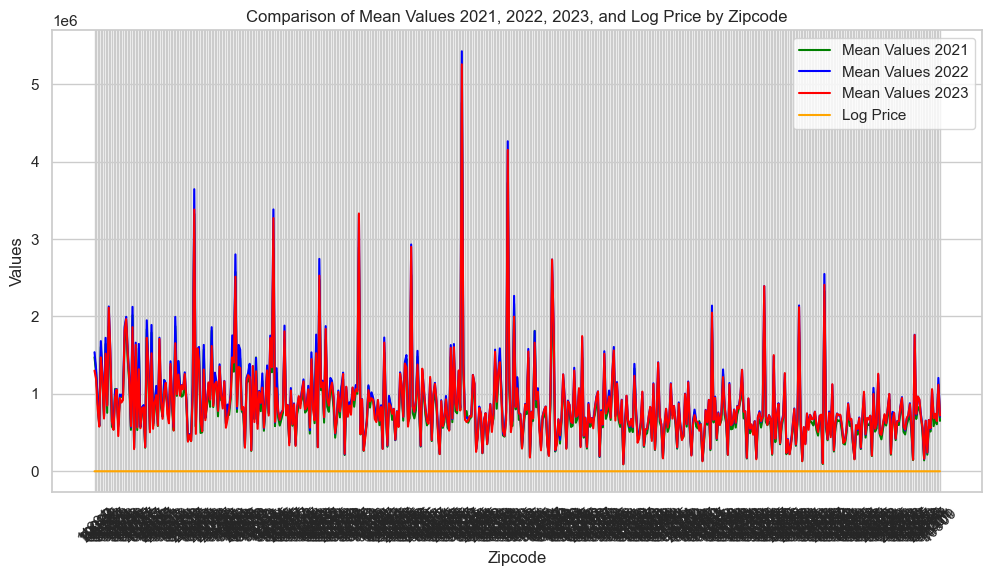

In [46]:
# Merge the two DataFrames on the 'zipcode' column
merged_df = pd.merge(df_dropped, df2_dropped, on='zipcode', how='inner')

# Create a line bar graph using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='zipcode', y='mean_values_2021', data=merged_df, label='Mean Values 2021', color='green')
sns.lineplot(x='zipcode', y='mean_values_2022', data=merged_df, label='Mean Values 2022', color='blue')
sns.lineplot(x='zipcode', y='mean_values_2023', data=merged_df, label='Mean Values 2023', color='red')
sns.lineplot(x='zipcode', y='actual_price', data=merged_df, label='Log Price', color='orange')
plt.title('Comparison of Mean Values 2021, 2022, 2023, and Log Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()


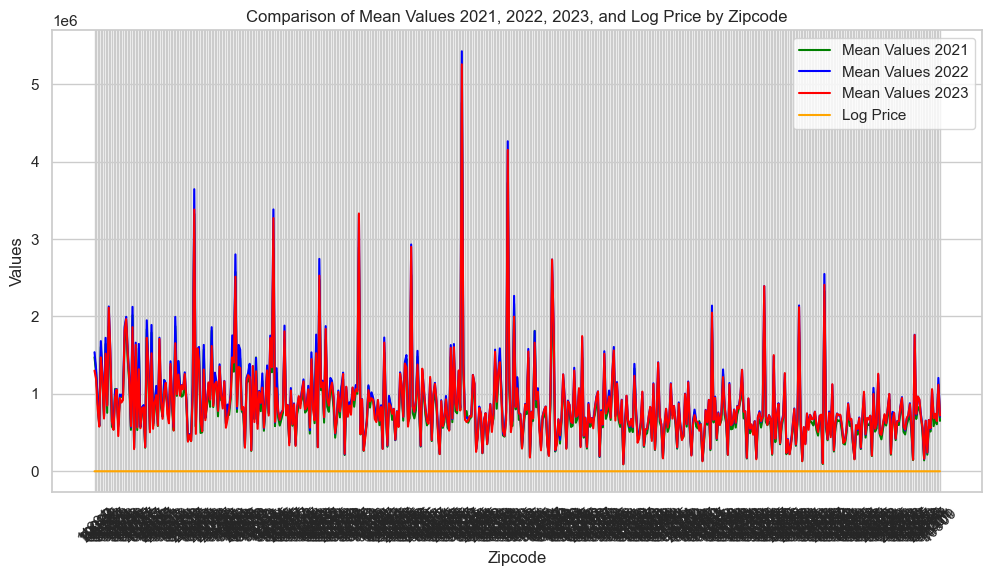

In [47]:
# Merge the two DataFrames on the 'zipcode' column
merged_df = pd.merge(df_dropped, df2_dropped, on='zipcode', how='inner')

# Create a line bar graph using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='zipcode', y='mean_values_2021', data=merged_df, label='Mean Values 2021', color='green')
sns.lineplot(x='zipcode', y='mean_values_2022', data=merged_df, label='Mean Values 2022', color='blue')
sns.lineplot(x='zipcode', y='mean_values_2023', data=merged_df, label='Mean Values 2023', color='red')
sns.lineplot(x='zipcode', y='actual_price', data=merged_df, label='Log Price', color='orange')
plt.title('Comparison of Mean Values 2021, 2022, 2023, and Log Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()


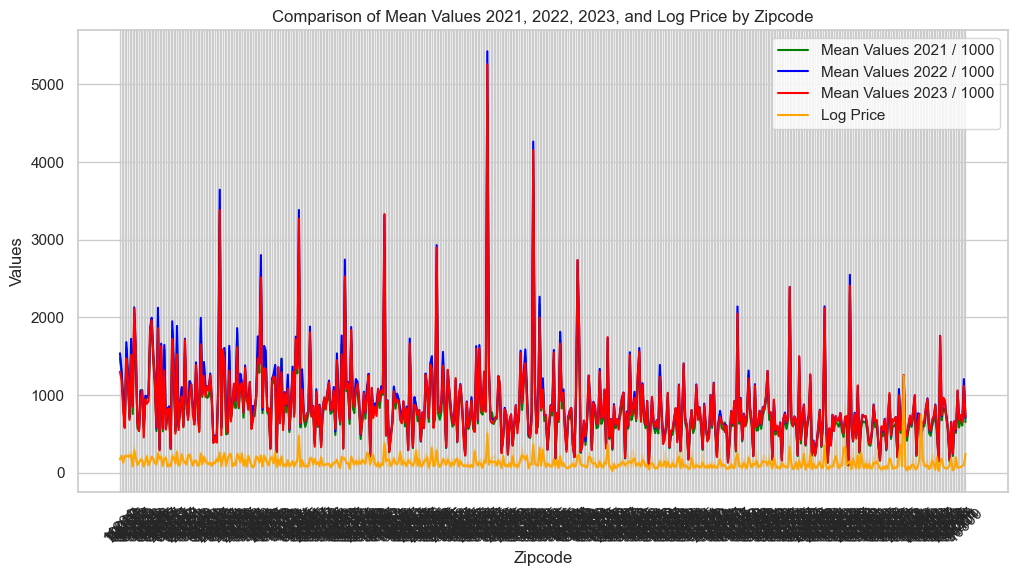

In [48]:
# Merge the two DataFrames on the 'zipcode' column
merged_df = pd.merge(df_dropped, df2_dropped, on='zipcode', how='inner')

# Multiply the 'mean_values_2021', 'mean_values_2022', and 'mean_values_2023' columns by 0.001
merged_df['mean_values_2021_modified'] = merged_df['mean_values_2021'] * 0.001
merged_df['mean_values_2022_modified'] = merged_df['mean_values_2022'] * 0.001
merged_df['mean_values_2023_modified'] = merged_df['mean_values_2023'] * 0.001

# Create a line bar graph using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='zipcode', y='mean_values_2021_modified', data=merged_df, label='Mean Values 2021 / 1000', color='green')
sns.lineplot(x='zipcode', y='mean_values_2022_modified', data=merged_df, label='Mean Values 2022 / 1000', color='blue')
sns.lineplot(x='zipcode', y='mean_values_2023_modified', data=merged_df, label='Mean Values 2023 / 1000', color='red')
sns.lineplot(x='zipcode', y='actual_price', data=merged_df, label='Log Price', color='orange')
plt.title('Comparison of Mean Values 2021, 2022, 2023, and Log Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()


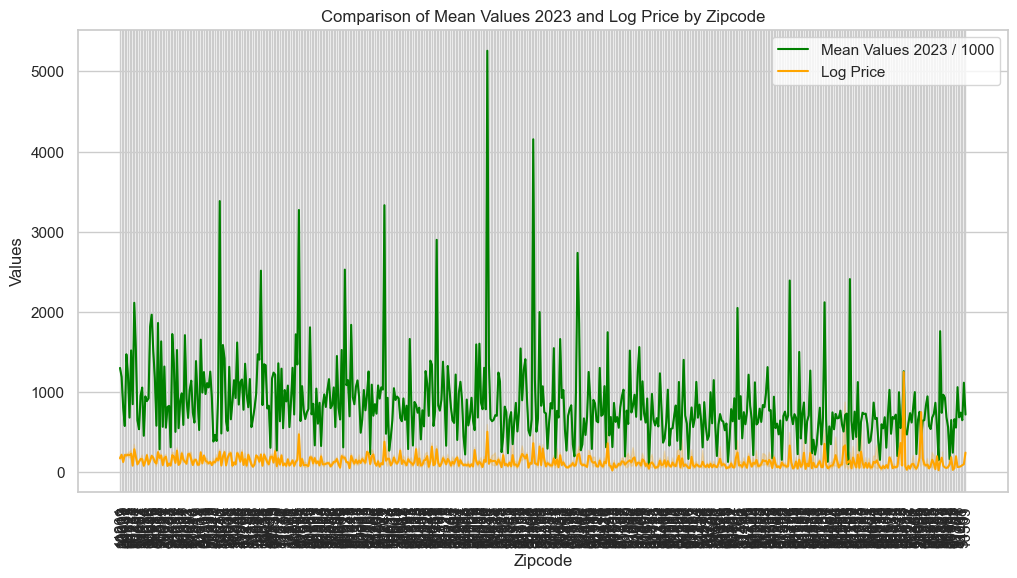

In [49]:
# Multiply the 'mean_values_2023' column by 0.0001
merged_df['mean_values_2023_modified'] = merged_df['mean_values_2023'] * 0.001

# Create a line bar graph using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='zipcode', y='mean_values_2023_modified', data=merged_df, label='Mean Values 2023 / 1000', color='green')
sns.lineplot(x='zipcode', y='actual_price', data=merged_df, label='Log Price', color='orange')
plt.title('Comparison of Mean Values 2023 and Log Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend()
plt.show()


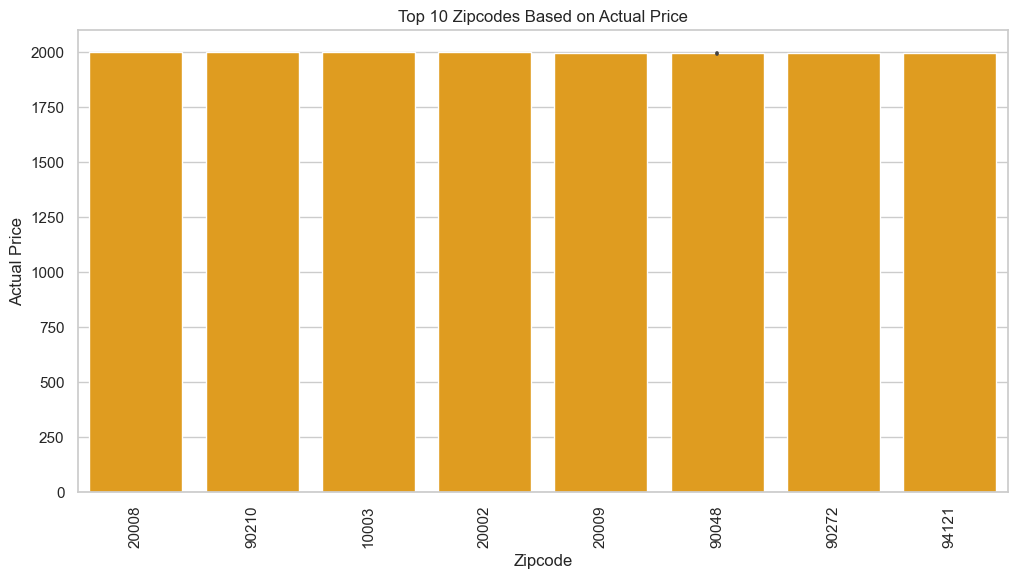

In [51]:

top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='actual_price', data=top_10_zipcodes, color='orange')
plt.title('Top 10 Zipcodes Based on Actual Price')
plt.xlabel('Zipcode')
plt.ylabel('Actual Price')
plt.xticks(rotation=90)
plt.show()


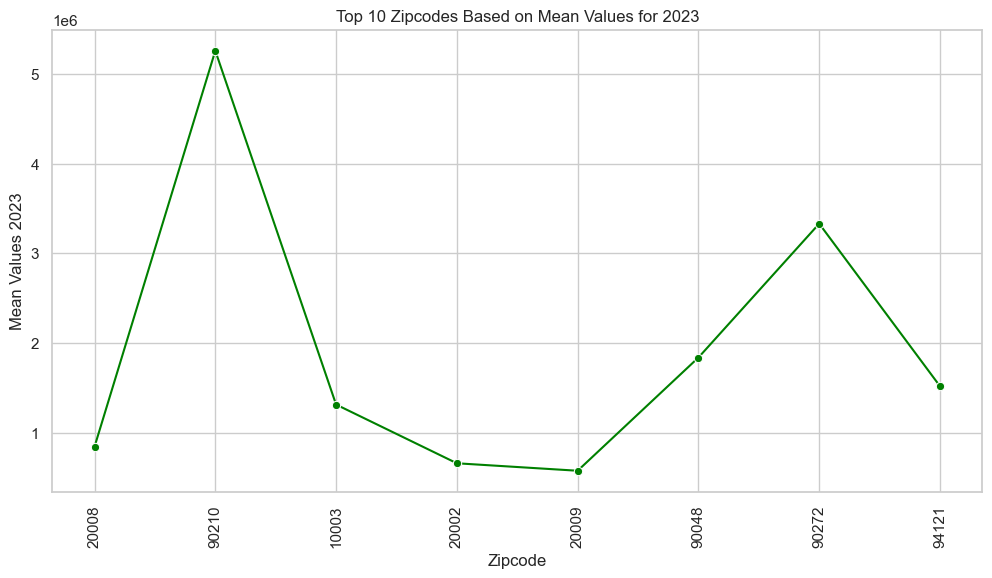

In [52]:
top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Plot mean values for 2023
sns.lineplot(x='zipcode', y='mean_values_2023', data=top_10_zipcodes, color='green', marker='o')

plt.title('Top 10 Zipcodes Based on Mean Values for 2023')
plt.xlabel('Zipcode')
plt.ylabel('Mean Values 2023')
plt.xticks(rotation=90)

plt.show()



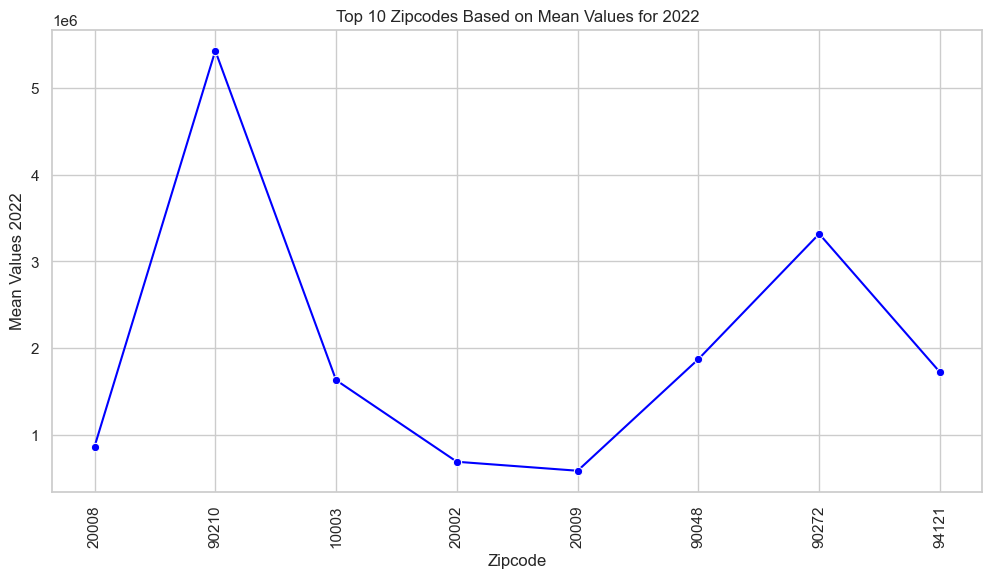

In [53]:
top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Plot mean values for 2022
sns.lineplot(x='zipcode', y='mean_values_2022', data=top_10_zipcodes, color='blue', marker='o')

plt.title('Top 10 Zipcodes Based on Mean Values for 2022')
plt.xlabel('Zipcode')
plt.ylabel('Mean Values 2022')
plt.xticks(rotation=90)

plt.show()


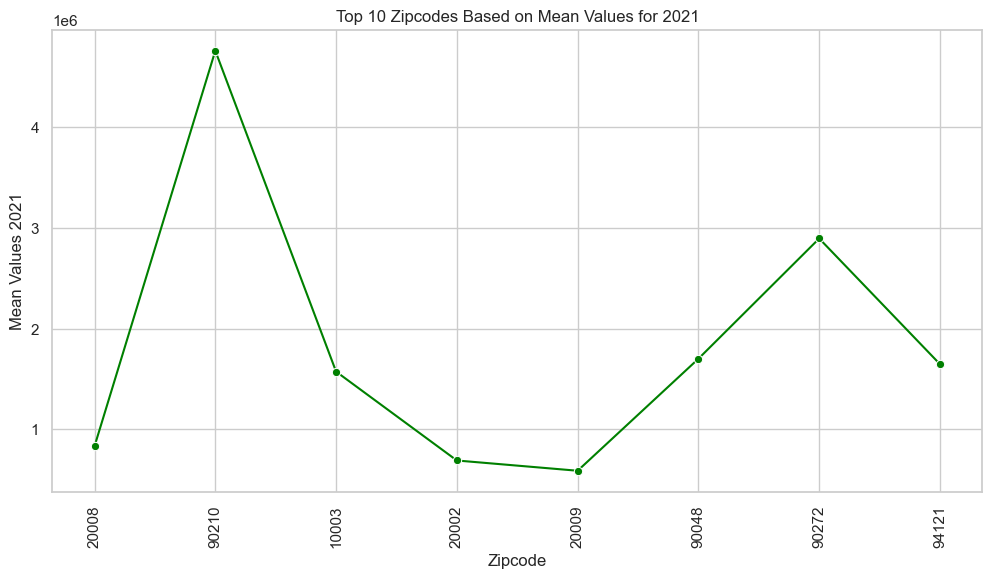

In [54]:
top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Plot mean values for 2021
sns.lineplot(x='zipcode', y='mean_values_2021', data=top_10_zipcodes, color='green', marker='o')

plt.title('Top 10 Zipcodes Based on Mean Values for 2021')
plt.xlabel('Zipcode')
plt.ylabel('Mean Values 2021')
plt.xticks(rotation=90)

plt.show()

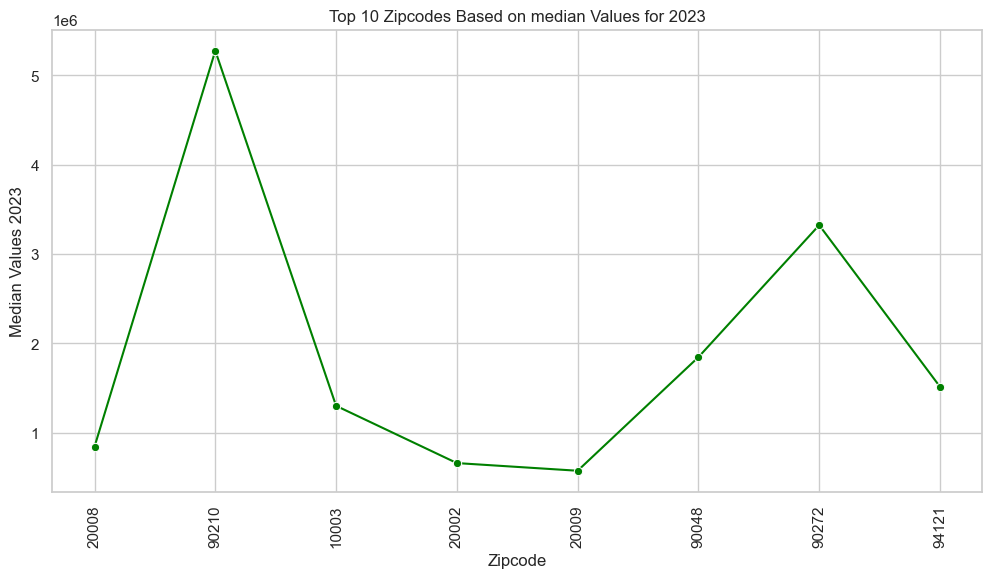

In [55]:
top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Plot mean values for 2023
sns.lineplot(x='zipcode', y='median_values_2023', data=top_10_zipcodes, color='green', marker='o')

plt.title('Top 10 Zipcodes Based on median Values for 2023')
plt.xlabel('Zipcode')
plt.ylabel('Median Values 2023')
plt.xticks(rotation=90)

plt.show()

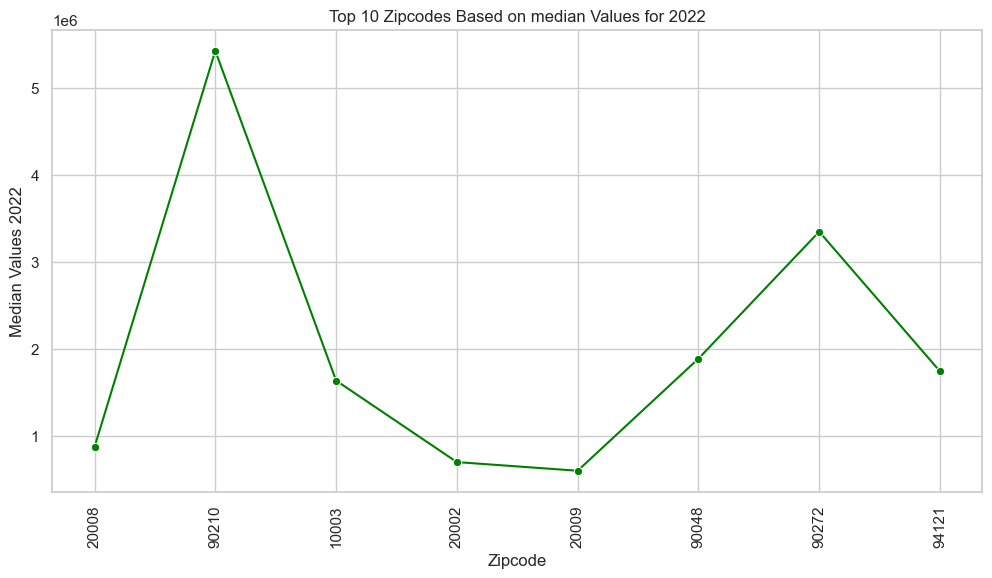

In [56]:
top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Plot mean values for 2022
sns.lineplot(x='zipcode', y='median_values_2022', data=top_10_zipcodes, color='green', marker='o')

plt.title('Top 10 Zipcodes Based on median Values for 2022')
plt.xlabel('Zipcode')
plt.ylabel('Median Values 2022')
plt.xticks(rotation=90)

plt.show()

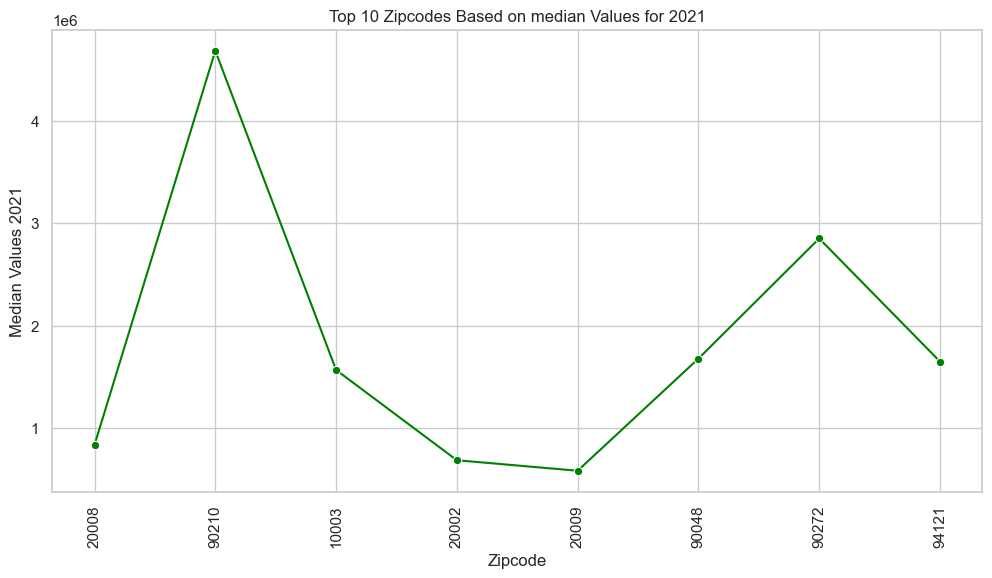

In [57]:
top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Plot mean values for 2021
sns.lineplot(x='zipcode', y='median_values_2021', data=top_10_zipcodes, color='green', marker='o')

plt.title('Top 10 Zipcodes Based on median Values for 2021')
plt.xlabel('Zipcode')
plt.ylabel('Median Values 2021')
plt.xticks(rotation=90)

plt.show()

In [58]:
from tabulate import tabulate

top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

table_rows = []
max_zipcode_length = max(len(str(row.zipcode)) for row in top_10_zipcodes.itertuples())

for index, row in top_10_zipcodes.iterrows():
    mean_2021_rounded = round(row['mean_values_2021'], 2)
    mean_2022_rounded = round(row['mean_values_2022'], 2)
    mean_2023_rounded = round(row['mean_values_2023'], 2)
    table_rows.append([row['zipcode'], row['Metro'], mean_2023_rounded, mean_2022_rounded, mean_2021_rounded])

headers = ["Zipcode", "Neighborhood", "Mean Value 2023", "Mean Value 2022", "Mean Value 2021"]
print(tabulate(table_rows, headers=headers, tablefmt="pretty", colalign=("center", "left", "right", "right", "right")))


+---------+----------------------------------------------+-----------------+-----------------+-----------------+
| Zipcode | Neighborhood                                 | Mean Value 2023 | Mean Value 2022 | Mean Value 2021 |
+---------+----------------------------------------------+-----------------+-----------------+-----------------+
|  20008  | Washington-Arlington-Alexandria, DC-VA-MD-WV |       844769.41 |       867848.15 |       829593.52 |
|  90210  | Los Angeles-Long Beach-Anaheim, CA           |       5257469.2 |      5425912.92 |       4760956.4 |
|  10003  | New York-Newark-Jersey City, NY-NJ-PA        |      1314973.66 |      1633044.78 |      1571554.89 |
|  20002  | Washington-Arlington-Alexandria, DC-VA-MD-WV |       660529.33 |       693331.08 |       688075.89 |
|  10003  | New York-Newark-Jersey City, NY-NJ-PA        |      1314973.66 |      1633044.78 |      1571554.89 |
|  20009  | Washington-Arlington-Alexandria, DC-VA-MD-WV |        577276.0 |       589815.08 |  

In [60]:
from tabulate import tabulate

top_10_zipcodes = merged_df.sort_values(by='actual_price', ascending=False).head(10)

table_rows = []
max_zipcode_length = max(len(str(row.zipcode)) for row in top_10_zipcodes.itertuples())

for index, row in top_10_zipcodes.iterrows():
    median_2021_rounded = round(row['median_values_2021'], 2)
    median_2022_rounded = round(row['median_values_2022'], 2)
    median_2023_rounded = round(row['median_values_2023'], 2)
    table_rows.append([row['zipcode'], row['Metro'], median_2023_rounded, median_2022_rounded, median_2021_rounded])

headers = ["Zipcode", "Neighborhood", "Median Value 2023", "Median Value 2022", "Median Value 2021"]
print(tabulate(table_rows, headers=headers, tablefmt="pretty", colalign=("center", "left", "right", "right", "right")))



+---------+----------------------------------------------+-------------------+-------------------+-------------------+
| Zipcode | Neighborhood                                 | Median Value 2023 | Median Value 2022 | Median Value 2021 |
+---------+----------------------------------------------+-------------------+-------------------+-------------------+
|  20008  | Washington-Arlington-Alexandria, DC-VA-MD-WV |          844623.0 |         867356.19 |         839481.69 |
|  90210  | Los Angeles-Long Beach-Anaheim, CA           |        5276641.85 |        5433155.52 |        4681099.41 |
|  10003  | New York-Newark-Jersey City, NY-NJ-PA        |        1301989.76 |        1633004.66 |        1569814.56 |
|  20002  | Washington-Arlington-Alexandria, DC-VA-MD-WV |         660907.06 |          694058.0 |         689858.86 |
|  10003  | New York-Newark-Jersey City, NY-NJ-PA        |        1301989.76 |        1633004.66 |        1569814.56 |
|  20009  | Washington-Arlington-Alexandria, DC-

# Now finding ount best ROI using Median

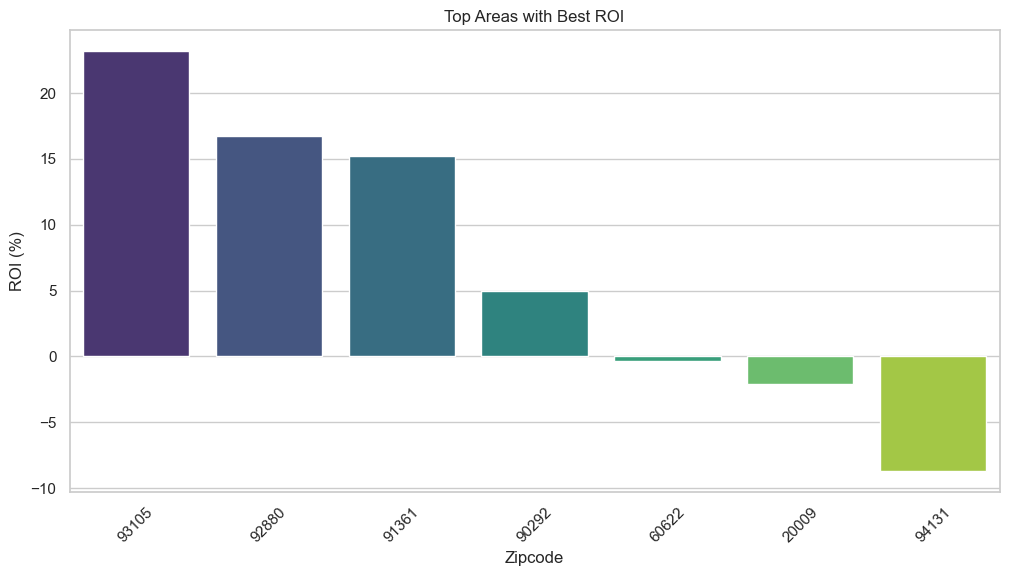

Top Areas with Best ROI:
+-------+---------+------------------+---------------------+
|       | Zipcode |       City       |         ROI         |
+-------+---------+------------------+---------------------+
| 59391 |  93105  |  Santa Barbara   |  23.16014674662875  |
| 59382 |  92880  |     Eastvale     | 16.766549747393118  |
| 57308 |  91361  | Westlake Village | 15.210643906424965  |
| 2810  |  90292  |  Marina del Rey  |  5.000586998748505  |
| 4049  |  60622  |     Chicago      | -0.3212560700061451 |
| 1613  |  20009  |    Washington    | -2.087033066342053  |
| 2536  |  94131  |  San Francisco   |  -8.71852276980658  |
+-------+---------+------------------+---------------------+


In [77]:
# Remove duplicate entries based on 'Neighborhood'
unique_areas = merged_df.drop_duplicates(subset=['Metro'])

# Calculate ROI for each zip code
unique_areas['roi'] = (unique_areas['median_values_2023'] - unique_areas['median_values_2021']) / unique_areas['median_values_2021'] * 100

# Sort areas based on ROI
top_roi_areas = unique_areas.sort_values(by='roi', ascending=False).head(7)

# Plot the ROI for top areas
plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='roi', data=top_roi_areas, palette='viridis')
plt.title('Top Areas with Best ROI')
plt.xlabel('Zipcode')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)
plt.show()


# Print the top areas with best ROI
print("Top Areas with Best ROI:")
print(tabulate(top_roi_areas[['zipcode', 'City', 'roi']], headers=["Zipcode", "City", "ROI"], tablefmt="pretty"))

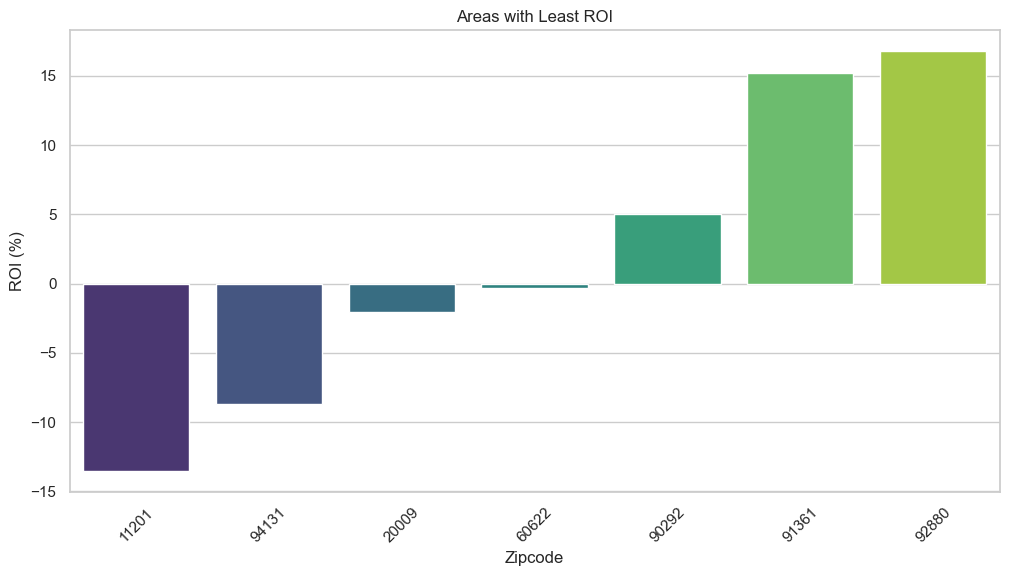

Areas with Least ROI:
+-------+---------+------------------+---------------------+
|       | Zipcode |       City       |         ROI         |
+-------+---------+------------------+---------------------+
|   0   |  11201  |     New York     | -13.555268927176241 |
| 2536  |  94131  |  San Francisco   |  -8.71852276980658  |
| 1613  |  20009  |    Washington    | -2.087033066342053  |
| 4049  |  60622  |     Chicago      | -0.3212560700061451 |
| 2810  |  90292  |  Marina del Rey  |  5.000586998748505  |
| 57308 |  91361  | Westlake Village | 15.210643906424965  |
| 59382 |  92880  |     Eastvale     | 16.766549747393118  |
+-------+---------+------------------+---------------------+


In [78]:
# Sort areas based on ROI in ascending order to find the least ROI
bottom_roi_areas = unique_areas.sort_values(by='roi', ascending=True).head(7)

# Plot the ROI for bottom areas
plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='roi', data=bottom_roi_areas, palette='viridis')
plt.title('Areas with Least ROI')
plt.xlabel('Zipcode')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)
plt.show()

# Print the areas with least ROI
print("Areas with Least ROI:")
print(tabulate(bottom_roi_areas[['zipcode', 'City', 'roi']], headers=["Zipcode", "City", "ROI"], tablefmt="pretty"))


In [79]:
categorical_col = []
numerical_col = []

for column in merged_df.columns:
    if merged_df[column].dtypes != "float64" and merged_df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

print("**Categorical Columns:**")
for col in categorical_col:
    print(col)

**Categorical Columns:**
property_type
room_type
bed_type
cancellation_policy
cleaning_fee
city
description
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
instant_bookable
last_review
name
neighbourhood
thumbnail_url
zipcode
RegionType
StateName
State
City
Metro
CountyName


In [80]:
print("\nNumerical Columns:")
for col in numerical_col:
    print(col)


Numerical Columns:
id
log_price
amenities
accommodates
bathrooms
latitude
longitude
number_of_reviews
review_scores_rating
bedrooms
beds
actual_price
RegionID
SizeRank
mean_values_2022
mean_values_2023
mean_values_2021
median_values_2022
median_values_2023
median_values_2021
mean_values_2021_modified
mean_values_2022_modified
mean_values_2023_modified
roi


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [82]:
for col in categorical_col:
    merged_df[col] = le.fit_transform(merged_df[col])

In [83]:
pd.set_option("display.max_columns",None)
df

id  log_price property_type        room_type  amenities  \
0       6901257   5.010635     Apartment  Entire home/apt        152   
1       6304928   5.129899     Apartment  Entire home/apt        218   
2       7919400   4.976734     Apartment  Entire home/apt        311   
3      13418779   6.620073         House  Entire home/apt        210   
4       3808709   4.744932     Apartment  Entire home/apt        174   
...         ...        ...           ...              ...        ...   
74106  14549287   4.605170     Apartment     Private room          2   
74107  13281809   5.043425     Apartment  Entire home/apt        224   
74108  18688039   5.220356     Apartment  Entire home/apt        402   
74109  17045948   5.273000     Apartment  Entire home/apt        189   
74110   3534845   4.852030          Boat  Entire home/apt        279   

       accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  \
0                 3        1.0  Real Bed              strict          True   
1                 7        1.0  Real Bed              strict          True   
2                 5        1.0  Real Bed            moderate          True   
3                 4        1.0  Real Bed            flexible          True   
4                 2        1.0  Real Bed            moderate          True   
...             ...        ...       ...                 ...           ...   
74106             1        1.0  Real Bed            flexible         False   
74107             4        2.0  Real Bed            moderate          True   
74108             5        1.0  Real Bed            moderate          True   
74109             2        1.0  Real Bed              strict          True   
74110             4        1.0  Real Bed            moderate         False   

      city                                        description first_review  \
0      NYC  Beautiful, sunlit brownstone 1-bedroom in the ...   2016-06-18   
1      NYC  Enjoy travelling during your stay in Manhattan...   2017-08-05   
2      NYC  The Oasis comes complete with a full backyard ...   2017-04-30   
3       SF  This light-filled home-away-from-home is super...   2017-04-30   
4       DC  Cool, cozy, and comfortable studio located in ...   2015-05-12   
...    ...                                                ...          ...   
74106  NYC                          one room in bushwick apt    2016-03-25   
74107   LA  Located on the Pacific Coast Highway, this apa...   2016-08-15   
74108  NYC  A modern apartment located in East Williamsbur...   2015-01-03   
74109  NYC  Fully renovated, designer's studio located in ...   2015-01-03   
74110   LA  You will stay-aboard the Island Trader at one ...   2013-09-05   

      host_has_profile_pic host_identity_verified host_response_rate  \
0                        t                      t                NaN   
1                        t                      f               100%   
2                        t                      t               100%   
3                        t                      t                NaN   
4                        t                      t               100%   
...                    ...                    ...                ...   
74106                    t                      t                NaN   
74107                    t                      f               100%   
74108                    t                      t               100%   
74109                    t                      f               100%   
74110                    t                      t               100%   

       host_since instant_bookable last_review   latitude   longitude  \
0      2012-03-26                f  2016-07-18  40.696524  -73.991617   
1      2017-06-19                t  2017-09-23  40.766115  -73.989040   
2      2016-10-25                t  2017-09-14  40.808110  -73.943756   
3      2015-04-19                f  2017-09-14  37.772004 -122.431619   
4      2015-03-01                t  2017-01-

# Heatmap 

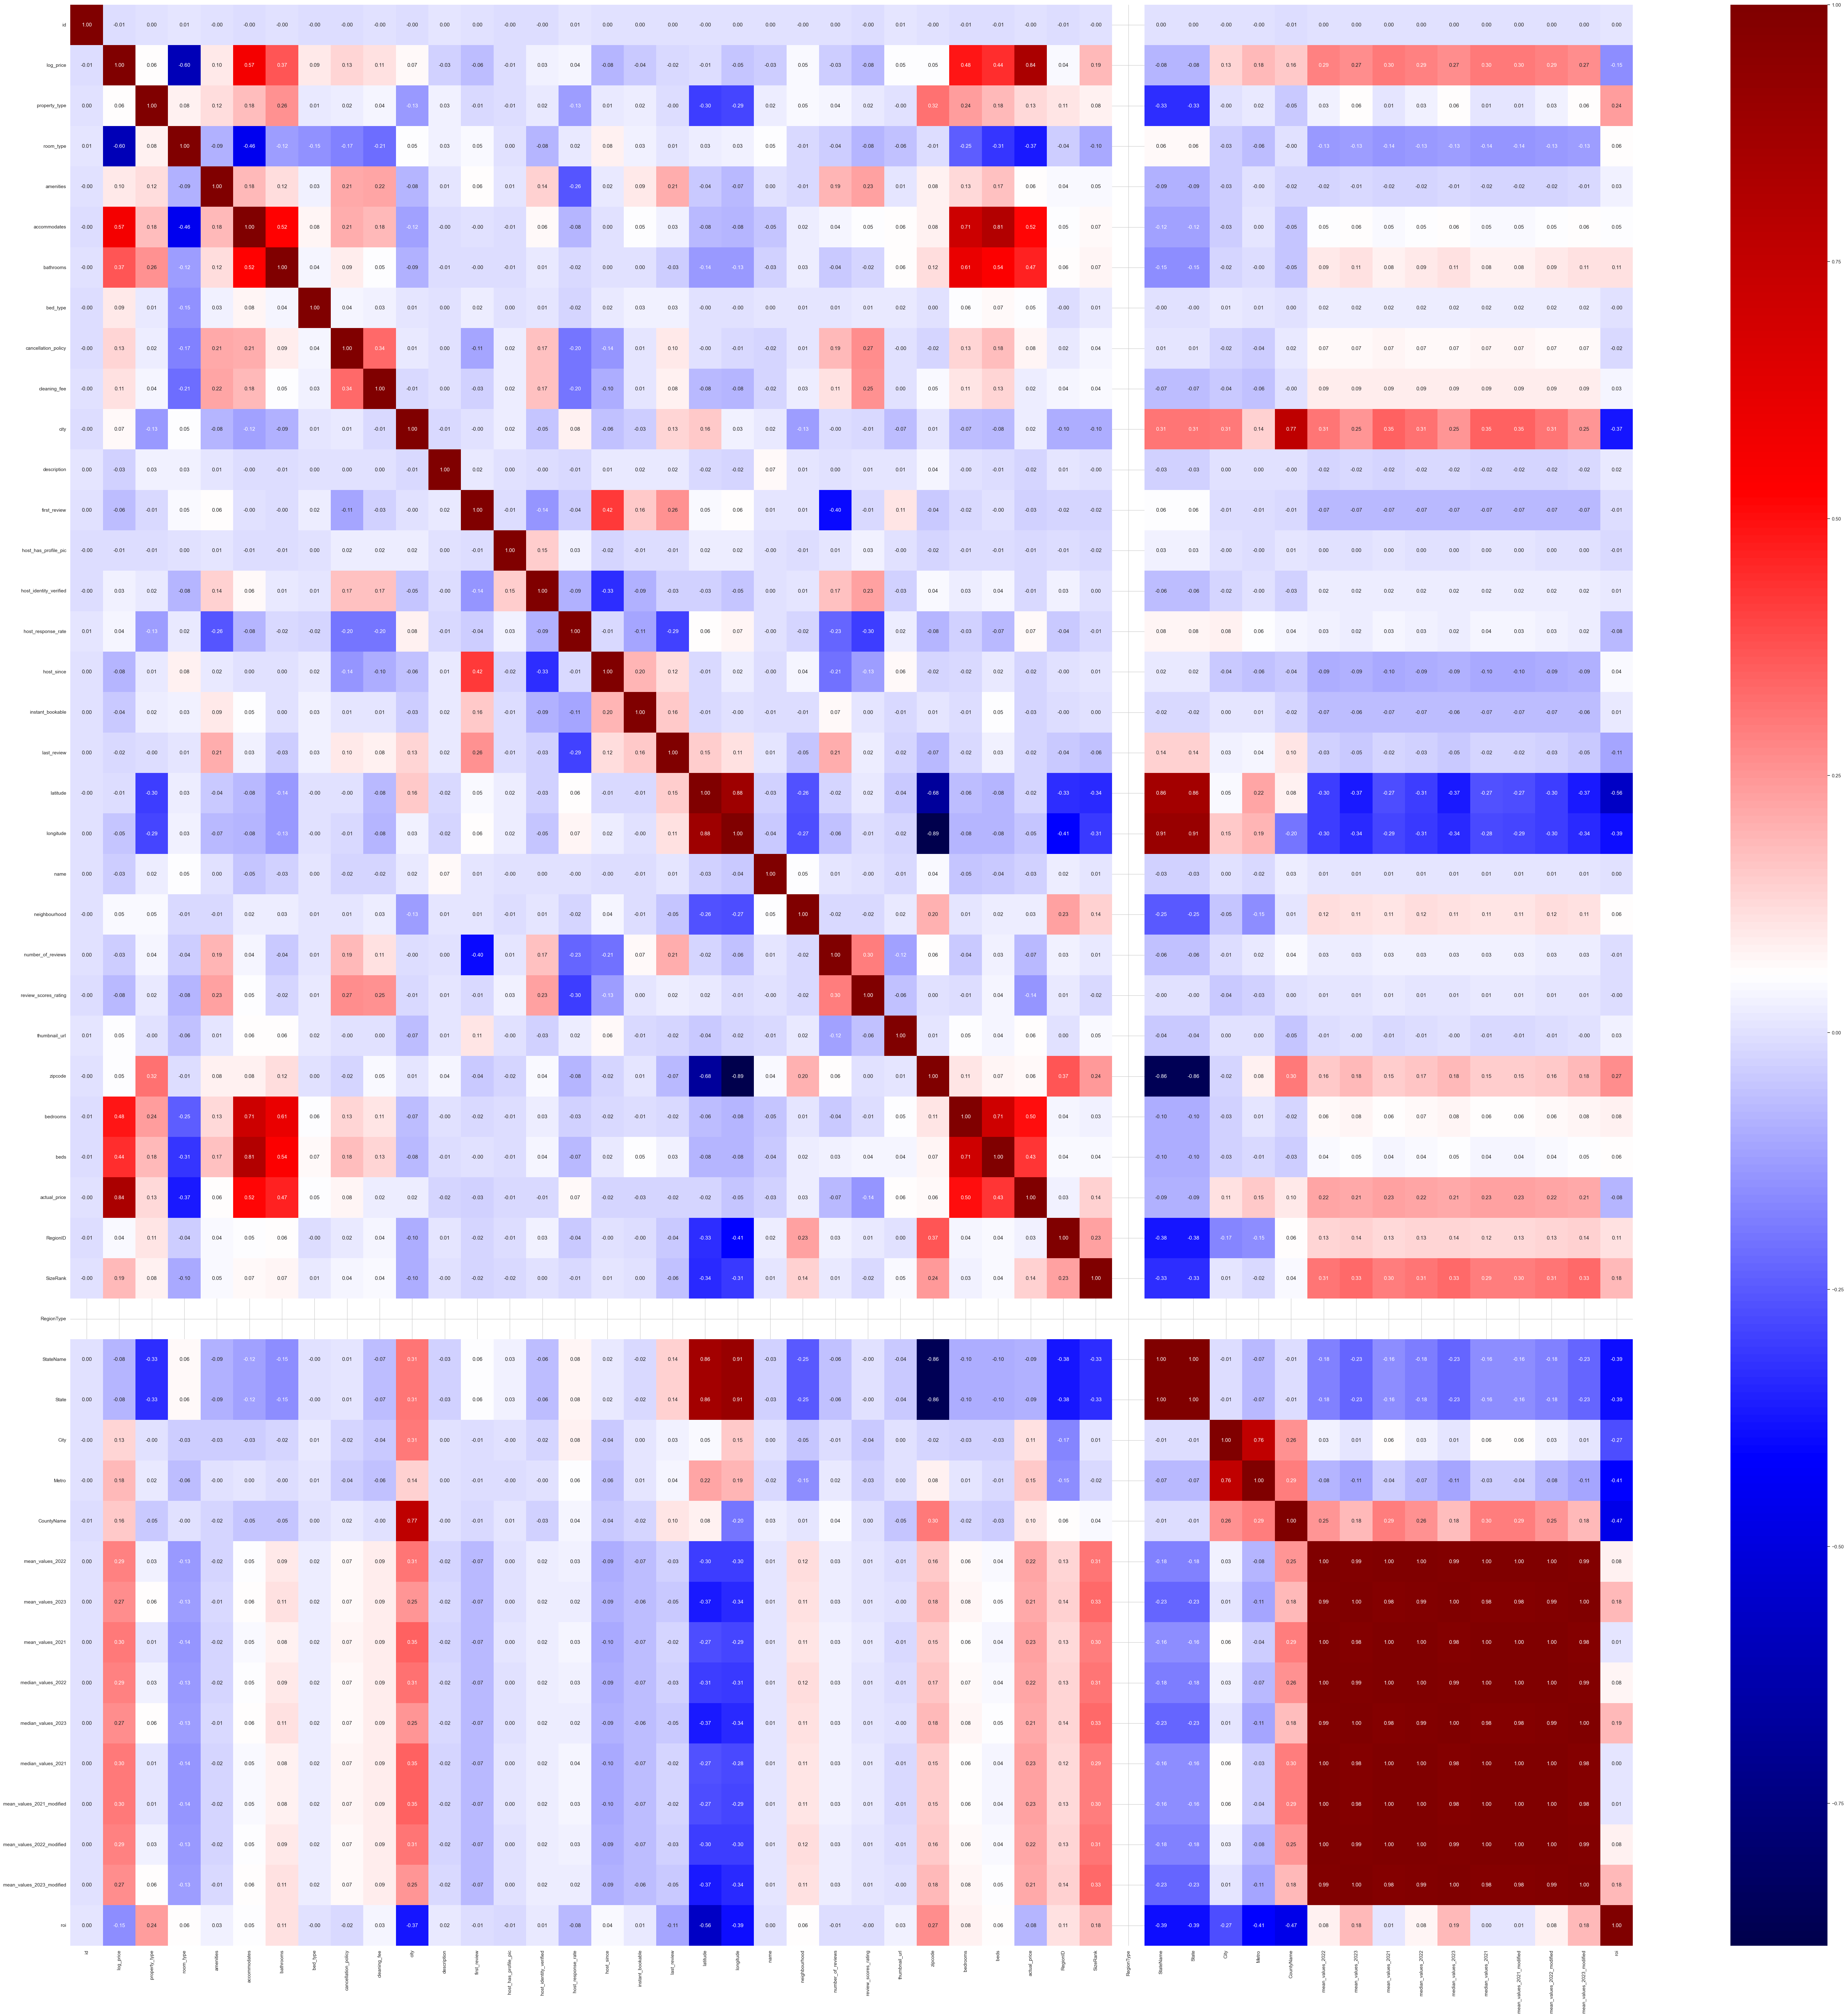

In [84]:

plt.figure(figsize = (80,80))
sns.heatmap(merged_df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [85]:
x = merged_df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode","RegionType"],axis = 1)
y = merged_df.log_price

### So dropped the columns which have very less co-relation for better Training and Testing

# Actual problem Statement - Price Prediction for merged dataset

# Linear Regression

In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

In [88]:
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [89]:
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.22196288648828005

Mean Squarred Error of Linear Regression     :  0.0893119783369116

Root Mean Squarred Error of Linear Regression:  0.29885109726569786

R2 Score of Linear Regression                :  0.8327917661967


# Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [91]:
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [92]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.0002167376039068448

Mean Squarred Error of Random Forest Regressor     :  0.0002970119647745395

Root Mean Squarred Error of Random Forest Regressor:  0.0172340350694357

R2 Score of Random Forest Regressor                :  0.9994439396934972


# Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbdt = GradientBoostingRegressor()

# Fit the model to the training data
gbdt.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred_gbdt = gbdt.predict(x_test)


In [94]:
# Evaluate the performance of the model
mae_gbdt = metrics.mean_absolute_error(y_test, y_pred_gbdt)
mse_gbdt = metrics.mean_squared_error(y_test, y_pred_gbdt)
rmse_gbdt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbdt))
r2_gbdt = metrics.r2_score(y_test, y_pred_gbdt)

# Print the evaluation metrics
print('\nMean Absolute Error of Gradient Boosting Decision Trees: ', mae_gbdt)
print('\nMean Squared Error of Gradient Boosting Decision Trees: ', mse_gbdt)
print('\nRoot Mean Squared Error of Gradient Boosting Decision Trees: ', rmse_gbdt)
print('\nR2 Score of Gradient Boosting Decision Trees: ', r2_gbdt)




Mean Absolute Error of Gradient Boosting Decision Trees:  0.0021524376918268537

Mean Squared Error of Gradient Boosting Decision Trees:  0.00023860564610199243

Root Mean Squared Error of Gradient Boosting Decision Trees:  0.015446865251629291

R2 Score of Gradient Boosting Decision Trees:  0.9995532869229511


# XG Boost

In [95]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgboost = xgb.XGBRegressor()

# Fit the model to the training data
xgboost.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred_xgb = xgboost.predict(x_test)

# Evaluate the performance of the model
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb = metrics.r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print('\nMean Absolute Error of XGBoost: ', mae_xgb)
print('\nMean Squared Error of XGBoost: ', mse_xgb)
print('\nRoot Mean Squared Error of XGBoost: ', rmse_xgb)
print('\nR2 Score of XGBoost: ', r2_xgb)




Mean Absolute Error of XGBoost:  0.0005284749168173192

Mean Squared Error of XGBoost:  0.00022196567643941833

Root Mean Squared Error of XGBoost:  0.014898512557950822

R2 Score of XGBoost:  0.9995844399663573
